# INF8225: Travail pratique 1
____

Claudia Onorato (1845448)

# Partie 1
___
L’objectif de la partie I du travail pratique est de permettre à l’étudiant de se familiariser avec les réseaux Bayésiens et la librairie Numpy. Considérons le réseau Bayésien ci-dessous. Il s’agit d’un exemple bien connu appelé « wet grass », souvent utilisé pour illustrer l’effet de « explaining away ».



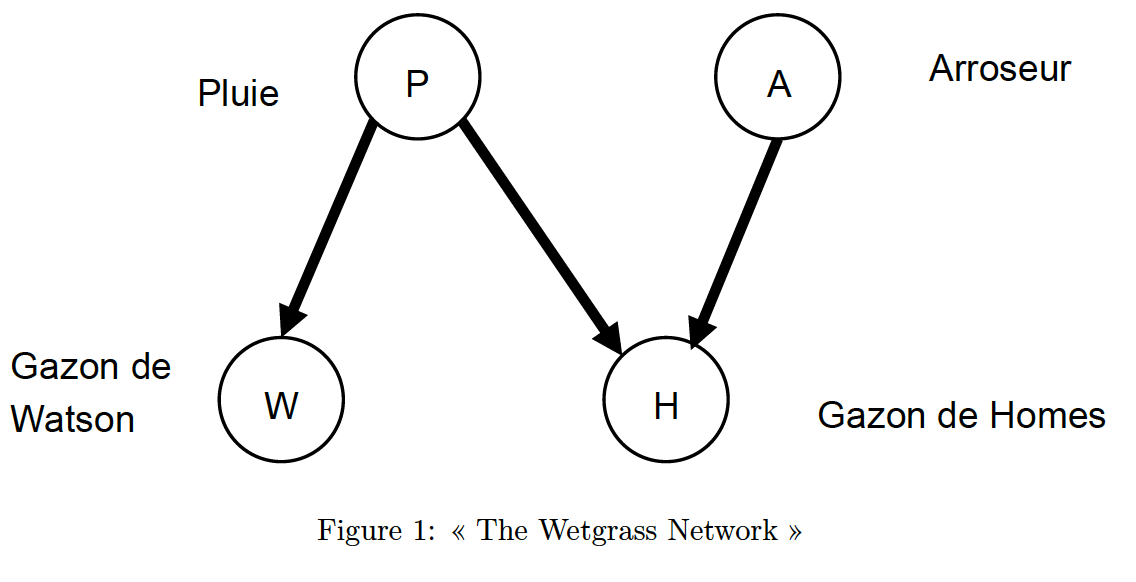

Voici les tables de probabilités conditionnelles fournies:
- La probabilité qu’il ait plu: Pr(P = 1) = 0:2
- La probabilité que l’arroseur ait fonctionné: Pr(A = 1) = 0:1
- La probabilité que le gazon de Watson soit mouillé...
    - ... sachant qu’il a plu est Pr(W = 1jP = 1) = 1
    - ... sachant qu’il n’a pas plu: Pr(W = 1jP = 0) = 0:2
- La probabilité que Holmes remarque que son gazon est mouillé...
    - ... sachant que l’arroseur a fonctionné et qu’il n’a pas plu: Pr(H = 1jP = 0;A = 1) = 0:9
    - ... sachant que l’arroseur n’a pas fonctionné et qu’il n’a pas plu: Pr(H = 1jP = 0;A = 0) = 0
    - ... sachant qu’il a plu, et que l’arroseur ait ou pas fonctionné: Pr(H = 1jP = 1;A = 0; 1) = 1
    
Donnez une équation pour chaque calcul et une explication de quelques phrases concernant les calculs en termes
de concepts d’indépendance conditionnelle et de dépendance conditionnelle quand ces concepts sont applicables.
Vous pouvez calculer les probabilités a), b), c), d), e), et f) en utilisant les arrays suivantes et les propriétés de «
broadcasting » de numpy. Vous devez soumettre votre code et inclure dans le rapport vos explications écrites et
les équations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# les arrays sont battis avec les dimensions suivantes:
# pluie, arroseur, Watson, Holmes
# et chaque dimension contient deux éléments: (proba que ça soit faux), (proba que ça soit vrai)

prob_pluie = np.array([0.8, 0.2]).reshape(2, 1, 1, 1)
print(f"Pr(Pluie)= {np.squeeze(prob_pluie)}\n")

prob_arroseur = np.array([0.9, 0.1]).reshape(1, 2, 1, 1)
print(f"Pr(Arroseur)= {np.squeeze(prob_arroseur)}\n")

watson = np.array([
    [0.8, 0.2],     # Pluie = False
    [0  , 1  ]      # Pluie = True
]).reshape(2, 1, 2, 1)
print(f"Pr(Watson|P)= \n{np.squeeze(watson)}\n")

holmes = np.array([
    [ # Pluie = False
        [1. , 0  ], # Arroseur = False
        [0.1, 0.9]  # Arroseur = True
    ],
    [ # Pluie = True
        [0, 1], # Arroseur = False
        [0, 1]  # Arroseur = True
    ],
]).reshape(2,2,1,2)
print(f"Pr(Holmes|P,A)= \n{np.squeeze(holmes)}\n");

In [ ]:
prob_watson_wet = (watson*prob_pluie).sum(0).squeeze()[1]

print(f"Pr(W=1|P=0) = {watson[0,:,1,:]}\n")
print(f"Pr(W=1) = Pr(W=1|P=1)*Pr(P=1) + Pr(W=1|P=0)*Pr(P=0) = {prob_watson_wet}\n")

### a) Pr(H = 1)
___

Nous utilisons la loi des probabilités totales pour calculer la probabilité que le gazon de Holmes soit mouillé. Nous assumons que les variables aléatoires `A` (arroseur) et `P` (pluie) sont indépendantes, selon la figure fournie du network.

```
Pr(H=1) = Pr(H=1|A=0,P=0)*P(A=0,P=0) +
          Pr(H=1|A=1,P=0)*P(A=1,P=0) +
          Pr(H=1|A=0,P=1)*P(A=0,P=1) +
          Pr(H=1|A=1,P=1)*P(A=1,P=1)

Par indépendance des variables aléatoires, Pr(A,P) == Pr(A)*Pr(P)

Pr(H=1) = Pr(H=1|A=0,P=0)*P(A=0)*Pr(P=0) +
          Pr(H=1|A=1,P=0)*P(A=1)*Pr(P=0) +
          Pr(H=1|A=0,P=1)*P(A=0)*Pr(P=1) +
          Pr(H=1|A=1,P=1)*P(A=1)*Pr(P=1)
```

In [ ]:
prob_holmes_wet = (holmes*prob_arroseur*prob_pluie).sum(0).sum(0).squeeze()[1]
print(f"Pr(H=1) = {prob_holmes_wet}")

### b) Pr(H = 1|W = 1)
___

Nous cherchons la probabilité que le gazon soit mouillé chez Holmes sachant qu'il est mouillé chez Watson. Nous utilisons la probabilité conditionnelle de Holmes sachant Watson.

$$Pr(H=1|W=1) = \frac{Pr(W=1,H=1)}{Pr(W=1)} $$

La probabilité que le gazon de Waston soit mouillé a été calculée au numéro a). Pour la probabilité que les gazons de Watson et Holmes, on ne peut assumer que ces variables aléatoires sont indépendantes. Nous allons alors utiliser la loi des probabilités totales.

$$Pr(W=1,H=1) = \sum_{p=0}^{1}\sum_{a=0}^{1} Pr(W=1,H=1|A=a,P=p)*Pr(A=a,P=p)$$

Nous pouvons assumer que les variables $W$ et $H$ indépendantes si l'on connait la variable aléatoire $P$ (pluie). Les variables $A$ et $P$ sont également indépendantes.

$$Pr(W=1,H=1) = \sum_{p=0}^{1}\sum_{a=0}^{1} Pr(W=1|A=a,P=p)*Pr(H=1|A=a,P=p)*Pr(A=a,P=p)$$
$$Pr(W=1,H=1) = \sum_{p=0}^{1}\sum_{a=0}^{1} Pr(W=1|A=a,P=p)*Pr(H=1|A=a,P=p)*Pr(A=a)*Pr(P=p)$$

In [ ]:
proba_watson_wet_and_holmes_wet = (holmes * watson * prob_arroseur * prob_pluie)[:,:,1,1].sum()
prob_holmes_wet_knowing_watson_wet = proba_watson_wet_and_holmes_wet / prob_watson_wet

print(f"Pr(H=1|W=1) = {proba_watson_wet_and_holmes_wet:.3f}/{prob_watson_wet:.3f} = {prob_holmes_wet_knowing_watson_wet:.3f}")

### c) Pr(H = 1|W = 0)
___

On reprend les mêmes calculs qu'au b), en ne modifiant que la valeur observée de Watson. On aura alors:

$$Pr(H=1|W=0) = \frac{Pr(W=0,H=1)}{Pr(W=0)}$$

Où la valeur de $Pr(W=0,H=1)$ correspond à:

$$Pr(W=0,H=1) = \sum_{p=0}^{1}\sum_{a=0}^{1} Pr(W=0|A=a,P=p)*Pr(H=1|A=a,P=p)*Pr(A=a)*Pr(P=p)$$

Et où la probabilité que le gazon soit mouillé équivaut à $1-Pr(W=1)$.

In [ ]:
proba_watson_dry_and_holmes_wet = (holmes * watson * prob_arroseur * prob_pluie)[:,:,0,1].sum()
prob_watson_dry = 1 - prob_watson_wet
prob_holmes_wet_knowing_watson_dry = proba_watson_dry_and_holmes_wet / prob_watson_dry

print(f"Pr(H=1|W=0) = {proba_watson_dry_and_holmes_wet:.3f}/{prob_watson_dry:.3f} = {prob_holmes_wet_knowing_watson_dry:.3f}")

### d) Pr(H = 1|P = 0;W = 1)
___

De manière intuitive, comme nous savons que $H$ et $W$ sont conditionnellement indépendant selon $P$, nous nous doutons que $Pr(H=1|P=0,W=1) = Pr(H=1|P=0)$.

Il est possible de le prouver à l'aide des étapes suivantes:

$$Pr(H=1|P=1,W=1) = \frac{Pr(P=0,W=0|H=1)Pr(H=1)}{Pr(P=0,W=1)}$$
$$ = \frac{\frac{Pr(P=0,W=0,H=1)}{Pr(H=1)}Pr(H=1)}{Pr(P=0,W=1)}$$
$$ = \frac{Pr(P=0,W=0,H=1)}{Pr(P=0,W=1)}$$
$$ = \frac{Pr(W=0,H=1|P=0)Pr(P=0)}{Pr(P=0,W=1)}$$
$$ = \frac{Pr(W=0,H=1|P=0)}{Pr(W=1|P=0)}$$
$$ = \frac{Pr(H=1|P=0)Pr(W=1|P=0)}{Pr(W=1|P=0)}$$
$$ = Pr(H=1|P=0)$$

On définit ensuite cette probabilité avec la loi des probabilités totales:
$$ Pr(H=1|P=0) = \sum_{a=0}^{1} Pr(H=1|A=a,P=0)*Pr(A=a)$$


In [ ]:
prob_holmes_wet_knowing_no_rain = (holmes*prob_arroseur)[0,:,:,1].sum()

print(f"Pr(H=1|P=0,W=1) = Pr(H=1|P=0) = {prob_holmes_wet_knowing_no_rain:.3f}")

### e) Pr(W = 1|H = 1)
___

Nous cherchons la probabilité que le gazon soit mouillé chez Watson sachant qu'il est mouillé chez Holmes. Nous utilisons la probabilité conditionnelle de Watson sachant Holmes.

$$Pr(W=1|H=1) = \frac{Pr(W=1,H=1)}{Pr(H=1)} $$

La probabilité que le gazon de Watson et de Holmes soit mouillé a été calculé au numéro b). La probabilité que le gazon de Holmes soit mouillé a quant à lui été calculé au numéro a). Nous réutilisons alors ces résultats.

In [ ]:
prob_watson_wet_knowing_holmes_wet = proba_watson_wet_and_holmes_wet/prob_holmes_wet
print(f"Pr(W=1|H=1) = {prob_watson_wet_knowing_holmes_wet:.3f}")

### f) Pr(W = 1|H = 1;A = 1)
___

Puisqu'on connait H et A, on peut mettre à jour la fonction de probabilité de P, et conséquemment W. Le calcul de cette probabilité correspond alors à, avec la probabilité conditionnelle:

$$Pr(W=1|H=1,A=1) = \frac{Pr(W=1,H=1,A=1)}{Pr(H=1,A=1)}$$

Par règle de multiplicité:

$$= \frac{Pr(W=1,H=1|A=1)Pr(A=1)}{Pr(H=1|A=1)Pr(A=1)}$$

Par loi de probabilités totales:

$$= \frac{\sum_{p=0}^1 Pr(W=1,H=1|P=p,A=1)Pr(P=p)}{\sum_{p=0}^1 Pr(H=1|P=p,A=1)Pr(P=p)}$$

Par indépendance conditionnelle de H et W sachant P:

$$= \frac{\sum_{p=0}^1 Pr(H=1|P=p,A=1)Pr(W=1|P=p,A=1)Pr(P=p)}{\sum_{p=0}^1 Pr(H=1|P=p,A=1)Pr(P=p)}$$

In [ ]:
prob_watson_wet_knowing_holmes_wet_and_arr_wet = (watson*holmes*prob_pluie)[:,1,1,1].sum()/(holmes*prob_pluie)[:,1,:,1].sum()

print(f"Pr(W=1|H=1,A=1) = {prob_watson_wet_knowing_holmes_wet_and_arr_wet:.3f}")

# Partie 2
___

La partie 2 consiste à implémenter la descente du gradient pour optimiser la log-vraisemblance négative comme fonction de perte afin de faire de la classification d'image.



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Loading dataset
___

In [ ]:
digits = datasets.load_digits()

X = np.hstack((digits.data, np.ones((digits.data.shape[0],1))))
y = digits.target

y_one_hot = np.zeros((y.shape[0], len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]), y] = 1  # One hot encoding of shape (N,K), where N: nb of observations and K: nb of classes

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

W = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1])) # weights of shape (K,L+1), where K: nb of classes and L: nb of features

## Defining utils function
___



In [391]:
def get_y_pred(current_X, W):
    Z = np.dot(current_X, W.T)
    return np.array([softmax(z) for z in Z])

def softmax(x):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))
    
    # Source: https://stackoverflow.com/questions/42599498/numercially-stable-softmax

    exp = np.exp(x - max(x))
    return exp/np.sum(exp)

def get_accuracy(X, y, W):
    y_pred = get_y_pred(X, W)
    nb_correct_class = 0
    
    for i in range(y.shape[0]):
        expected_class_has_highest_probability = (y[i] * y_pred[i]).sum() >= max(y_pred[i])
        if expected_class_has_highest_probability:
            nb_correct_class += 1
            
    return nb_correct_class/y.shape[0]

def get_grads(y, y_pred, X):
    """
        Returns the gradients, of shape (nb_classes, nb_features+1), of the negative log likelihood function, in our case the loss function.
        
        y:      labels of shape (nb_observations, nb_classes)
        y_pred: probabilities for each class and each observation of shape (nb_observations, nb_classes)
        X:      features matrix of shape (nb_observations, nb_features+1)
    """
    # Both terms are shaped: (nb_class,nb_features+1)
    first_term_sum = np.zeros((y.shape[1], X.shape[1]))
    second_term_sum = np.zeros((y.shape[1], X.shape[1]))

    for i in range(y.shape[0]):
        first_term_sum += np.outer(y[i], X[i])
        second_term_sum += np.outer(y_pred[i], X[i])

    return first_term_sum - second_term_sum

def get_loss(y, y_pred):
    """
        Returns the loss calculated from the negative log likelihood loss function.
        
        y:      labels of shape (nb_observations, nb_classes)
        y_pred: probabilities for each class and each observation of shape (nb_observations, nb_classes)
    """
    loss = 0
    
    for i in range(y.shape[0]): # for each observation
        loss += -np.log((y[i]*y_pred[i]).sum())

    return loss

In [392]:
(y_one_hot[0]*[0.75,0.05, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025 ,0.025 ,0.025]).sum()

0.75

In [393]:
-(y_one_hot[0]*np.log([0.75,0.05, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025 ,0.025 ,0.025])).sum()

0.2876820724517809

## Declaration of parameters
___

In [394]:
nb_feature = X.shape[1] # includes the bias
nb_classes = y_one_hot.shape[1]

best_W = None
best_accuracy = 0
lr = 0.001
nb_epochs = 50
minibatch_size = len(y)//20

losses = []
accuracies = []

## Mini-batch gradient descent
___ 

In [395]:
for epoch in range(nb_epochs):
    loss = 0
    accuracy = 0
    for i in range(0, X_train.shape[0], minibatch_size):
        current_X = X[i: min(i + minibatch_size, X_train.shape[0])]
        current_y = y_one_hot[i: min(i + minibatch_size, X_train.shape[0])]
        current_batch_size = current_X.shape[0]

        y_pred = get_y_pred(current_X, W)
                
        W -= lr * get_grads(current_y, y_pred, current_X) # grad: shape (10,65)
    
    y_pred = get_y_pred(X_train, W)
    loss = get_loss(y_train, y_pred)
#     print(f"Current loss {loss}")

    losses.append(loss)  # compute the loss on the train set
    accuracy = get_accuracy(X_validation, y_validation, W)  # TODO
    accuracies.append(accuracy) # compute the accuracy on the validation set
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_W = W  # select the best parameters based on the validation accuracy 


/Users/claudiaonorato/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log


In [390]:
get_y_pred(X, W)
# y_one_hot[200]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [396]:
accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_W)
print(accuracy_on_unseen_data)  # 0.897506925208

0.08148148148148149


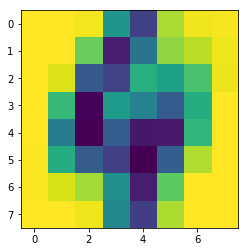

In [397]:
plt.plot(losses)

plt.imshow(best_W[4, :-1].reshape(8,8))

## Adam
___